# **Classification d'expressions faciales par les Réseaux de Neurones Convolutifs (CNN)**


Les entrées du modèles sont des images de visages en niveaux de gris de 48 x 48 pixels étiquettes avec sept classes : colère, dégoût, peur, joie, tristesse, surprise, neutre.

Les objectifs :
*   manipuler un jeu de données d'images afin de le préparer à être traiter par un réseau de neurones.
*   définir et implanter une architecture CNN pour réaliser un classifier d'images
*   créer une boucle d'entraînement en complétant les fonctions *train* et *evaluation*.
* entraîner un modèle et analyser les performances

L'ensemble du TP sera effectuer avec la bibliothèque d'apprentissage profond PyTorch.

Référence :
1. [Tutorials > Deep Learning with PyTorch: A 60 Minute Blitz > Training a Classifier](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)
2. Corpus disponible sur kaggle: [Face expression recognition dataset](https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset)
3. Explications sur les différentes couches : [Comprendre les Réseaux de Neurones Convolutifs (CNN)](https://yannicksergeobam.medium.com/comprendre-les-r%C3%A9seaux-de-neurones-convolutifs-cnn-d5f14d963714)

# Gestion du corpus

Une phase très importante d'une expérience d'apprentissage automatique est le formatage et chargement des données en mémoire. Le principe consiste à lire des fichiers contenant les données dans des structures de données (p.ex. tableau numpy) et les convertir en torch.*Tensor*.


Selon que vous traiter des données d'image, de texte, d'audio ou de vidéo, vous pouvez utiliser les bibliothèques python qui chargent les données dans un tableau numpy :
- pour les images, Pillow ou OpenCV peuvent être utilisés;


- pour l'audio, on peut utiliser scipy et librosa;


- enfin, pour le texte, le chargement peut se faire directement ou via les bibliothèques Cython, NLTK ou SpaCy.


Le code ci-dessous, télécharge le corpus d'image et importe les bibliothèques essentielles au traitement des données

In [ ]:
!git clone https://github.com/yongxin2020/TP_ML_IDL.git # get dataset

import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

Cloning into 'TP_ML_IDL'...
remote: Enumerating objects: 34113, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 34113 (delta 14), reused 37 (delta 7), pack-reused 34057
Receiving objects: 100% (34113/34113), 52.50 MiB | 26.47 MiB/s, done.
Resolving deltas: 100% (18/18), done.
Updating files: 100% (35895/35895), done.


# Chargement des données

## Questions

Q1 : Le corpus est livré avec trois partitions : train, dev et test. A quoi correspond chacune de ces partitions ?

Q2 : Dans le code ci-dessous, complétez les chemins pour acceder à la partition valid et test.

train : à entraîner le modèle.

dev (ou validation) : à évaluer le modèle pendant l'entraînement et à ajuster les hyperparamètres.

test : à évaluer la performance finale du modèle sur des données qu'il n'a jamais vues.


In [ ]:
###COMPLETEZ LE CODE DE LA CONFIGURATION CI-DESSOUS

PATH = "/content/TP_ML_IDL/CNN/Facial_Expression_Dataset/"

TRAIN_IMG_FOLDER_PATH = PATH + "train"
VALID_IMG_FOLDER_PATH = PATH + "validation"
TEST_IMG_FOLDER_PATH = PATH + "test"

DEVICE = 'cuda'

Pour charger les données images, nous utiliserons la bibliothèque `torchvision` de PyTorch. Notamment  `torchvision.datasets` contient une fonction  `ImageFolder` qui permet de charger des images et de les retourner directement sous forme de Tensor exploitable par PyTorch. Cette Tranformation est effectuée à traver l'operateur de transformation `transforms`.


## Questions
Q1: Complétez, ci dessous, le code de chargement  de la partition valid et test.

Q2: Donnez le pourcentage de chaque partition par rapport au nombre total d'exemples.

Q3 : Verifier que le nombre de classes considérées et correct avec l'instruction suivante

`print(trainset.class_to_idx)`



In [ ]:
from torchvision.datasets import ImageFolder
# transforms: The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].
from torchvision import transforms as T

### COMPLETEZ LES CODES SUIVANTS POUR CHARGER LES DOSSIERS D'IMAGES
# By default the imageFolder loads images with 3 channels and we expect the image to be grayscale.
# We transform the image to grayscale

trainset=ImageFolder(TRAIN_IMG_FOLDER_PATH,transform=T.ToTensor()) #chargement des images avec trois channels
validset=ImageFolder(VALID_IMG_FOLDER_PATH,transform=T.ToTensor())
testset=ImageFolder(TEST_IMG_FOLDER_PATH,transform=T.ToTensor())

In [ ]:
print(f"Total no. of examples in trainset : {len(trainset)}")
print(f"Total no. of examples in validset : {len(validset)}")
print(f"Total no. of examples in testset : {len(testset)}")

Total no. of examples in trainset : 28821
Total no. of examples in validset : 3535
Total no. of examples in testset : 3531


Voici quelques exemples d'images dans les données d'entraînement avec leurs étiquettes :

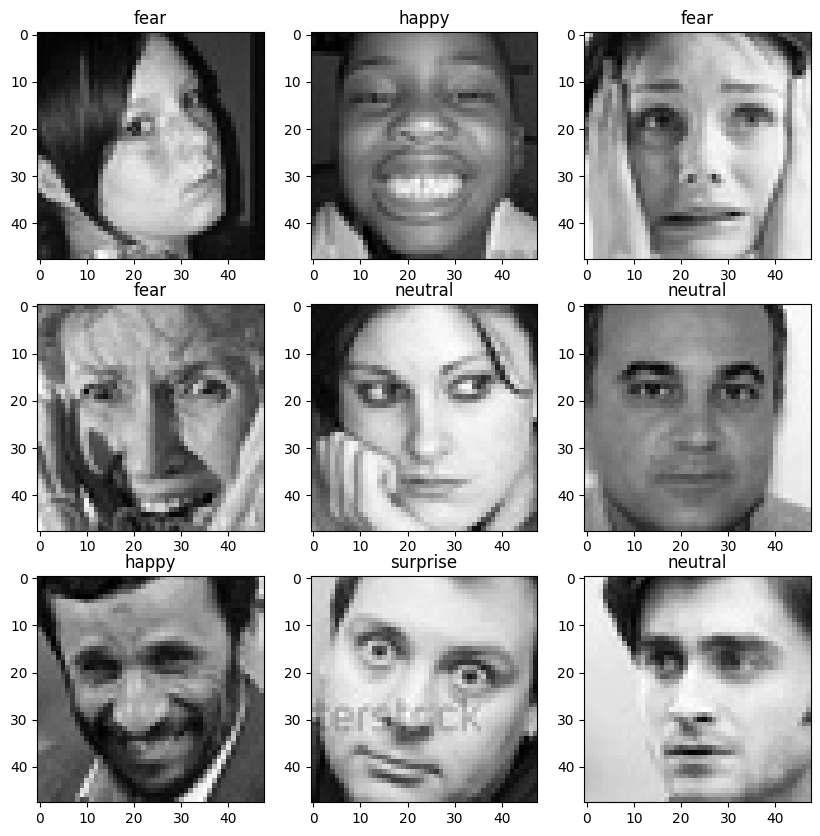

In [ ]:
#get some random train images
demoSet = []
for i in range(10):
  randIndex = int(np.random.uniform(0, len(trainset))) # get random number inside 0~len(trainset)
  demoSet.append(trainset[randIndex])

#plot the 9 images
plt.figure(figsize = (10,10))
for i in range(1,10,1):
  plt.subplot(3,3,i)
  image, label = demoSet[i]
  #PyTorch torch.permute() rearranges the original tensor according to the desired ordering and returns a new multidimensional rotated tensor.
  #The size of the returned tensor remains the same as that of the original.
  # plt.imshow(image.permute(1, 2, 0),cmap='gray') #(h, w, c)
  plt.imshow(image.permute(1, 2, 0)[:, :, 0], cmap='gray')
  plt.title(trainset.classes[label]) #label --> int
plt.show()

Le code ci-dessous affiche le contenu d'une image représentée sous forme de tenseur


## Questions

Q1 : Donnez les dimensions des images. Que représente chaque des dimensions ?

(tensor([[[0.5608, 0.4549, 0.4980,  ..., 0.6745, 0.7529, 0.8196],
         [0.3176, 0.2471, 0.2353,  ..., 0.4392, 0.4941, 0.6196],
         [0.0824, 0.0275, 0.0039,  ..., 0.2471, 0.3137, 0.4510],
         ...,
         [0.9882, 0.9882, 0.9608,  ..., 0.6157, 0.6745, 0.5804],
         [0.9922, 0.9765, 0.8392,  ..., 0.6314, 0.6235, 0.5804],
         [0.9804, 0.8235, 0.7529,  ..., 0.6275, 0.6510, 0.6314]],

        [[0.5608, 0.4549, 0.4980,  ..., 0.6745, 0.7529, 0.8196],
         [0.3176, 0.2471, 0.2353,  ..., 0.4392, 0.4941, 0.6196],
         [0.0824, 0.0275, 0.0039,  ..., 0.2471, 0.3137, 0.4510],
         ...,
         [0.9882, 0.9882, 0.9608,  ..., 0.6157, 0.6745, 0.5804],
         [0.9922, 0.9765, 0.8392,  ..., 0.6314, 0.6235, 0.5804],
         [0.9804, 0.8235, 0.7529,  ..., 0.6275, 0.6510, 0.6314]],

        [[0.5608, 0.4549, 0.4980,  ..., 0.6745, 0.7529, 0.8196],
         [0.3176, 0.2471, 0.2353,  ..., 0.4392, 0.4941, 0.6196],
         [0.0824, 0.0275, 0.0039,  ..., 0.2471, 0.3137, 0

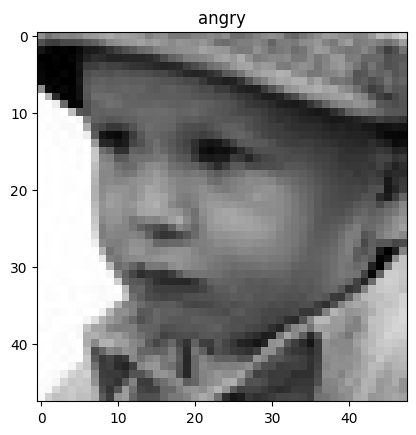

In [ ]:
image, label = trainset[20]

print(trainset[20])
print("------------------------------")
print((trainset[20][0]).size())

plt.imshow(image.permute(1, 2, 0)[:, :, 0], cmap='gray')
plt.title(trainset.classes[label]);

# Construction des lots (batches).

Durant l'apprentissage, les données ne sont fournies en un seul bloc ni fournie une par une. Elles sont regroupées en lot (<i>batches</i> en anglais). Nous utilisons ici la classe `DataLoader` qui se charge de former les lots durant l'apprentissage.  

## Questions
Q1 : Dans le cours, comment l'appelle la méthode d'optimisation qui utilise des gradients calculés sur des lots ? Pourquoi est-ce que cette methode est plus intéressante ?

R : **Descente de Gradient Stochastique (SGD)**

Efficacité computationnelle: Le calcul du gradient sur un mini-lot est plus rapide que sur l'ensemble des données, ce qui accélère l'apprentissage.

Convergence plus rapide: Les mises à jour plus fréquentes des paramètres avec mini-batch SGD permettent une convergence plus rapide vers un minimum local.

Généralisation améliorée: L'utilisation de mini-lots introduit du bruit dans le processus d'apprentissage, ce qui peut aider le modèle à éviter de surajuster aux données d'entraînement et à mieux généraliser aux données unseen.

Q2 : Que peut signifier BATCH_SIZE dans le code ci-dessous ?

BATCH_SIZE représente le nombre d'exemples (images dans ce cas) qui sont traités simultanément lors d'une itération d'apprentissage.

Par exemple, si BATCH_SIZE est égal à 32, le modèle traitera 32 images avant de mettre à jour ses paramètres.

Q3 : Completez le code pour les partitions <i>valid</i> et <i>test</i>.

Q4 : Commentez les dimensions des images. Que représente chaque dimension ?

One image batch shape : torch.Size([32, 3, 48, 48])

32: La taille du lot (BATCH_SIZE). Il y a 32 images dans ce lot.
3: Le nombre de canaux de couleur. Ici, 3 signifie que les images sont en couleur (RVB).
48: La hauteur de l'image en pixels.
48: La largeur de l'image en pixels.

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE=32

## COMPLETEZ LES CODES SUIVANTS
trainloader = DataLoader(trainset, batch_size = BATCH_SIZE, shuffle=True)
validloader = DataLoader(validset, batch_size=BATCH_SIZE)
testloader = DataLoader(testset, batch_size=BATCH_SIZE)

#affichage des classes
index = trainset.class_to_idx
# Get dictionary keys as a list using dict.keys()
classes = list(index.keys())
# ou directement
# classes=trainset.classes
print(classes)

print(f"Total no. of batches in trainloader : {len(trainloader)}")
print(f"Total no. of batches in validloader : {len(validloader)}")

for images, labels in trainloader:
  break;

print(f"One image batch shape : {images.shape}")
print(f"One label batch shape : {labels.shape}")

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Total no. of batches in trainloader : 901
Total no. of batches in validloader : 111
One image batch shape : torch.Size([32, 3, 48, 48])
One label batch shape : torch.Size([32])


# Définition de l'architecture des Réseaux de Neurones Convolutifs (CNN)

Parmi l'ensemble des réseaux de neurones profonds, nous avons CNN (réseaux de neurones convolutifs ou réseaux de neurones à convolution).

Le réseau neuronal convolutif (CNN) utilise l'opérateur de convolution pour apprendre à extraire l'information utile à partir des données brutes, l'information utile est transmise à un étage de décision (e.g., MLP).

Une architecture atypique d'un réseau convolutif se compose de 4 types de couches différentes : 1) couche convolutive, 2) couche de correction ReLU, 3) couche de pooling et 4) couche entièrement connectée (Fully connected).

La bibliothèque `Torch.nn` fournit des fonctions intégrées qui permettent de créer tous les éléments constitutifs des architectures CNN :

- Couches de convolution (`Convolution layers`)
- Couches de sous-échantillonnage (`Pooling layers`)
- Couches de bourrage (`Padding layers`)
- Fonctions d'activation (`Activation functions`)
- Fonctions de coût (`Loss functions`)
- Couches entièrement connectées (`Fully connected layers`) Il s'agit de couches de perceptrons classiques.

## Rappel : Operation de convolution


L'opération de convolution consiste à multiplier par un filtre chaque portion d'image pour calculer une nouvelle valeur.

![ConvolutionOperation](https://www.researchgate.net/profile/Chairi-Kiourt-2/publication/340500073/figure/fig3/AS:877888291233794@1586316287772/Example-of-a-square-image-convolution-with-zero-padding-While-training-a-CNN-there-are.png)

(<i> image extraite de Kiourt, Chairi & Pavlidis, George & Markantonatou, Stella. (2020). Deep learning approaches in food recognition.</i>)

Dans l'exemple ci-dessus un filtre de taille 3x3 (`kernel`) est utilisé pour calculer la valeur de cette région (ici 1). Le filtre se décale ensuite de 2 pixels (ce décalage s'appele `stride`). Pour calculer les valeurs des pixels au bord de l'image, on applique une zone de bourage constitués de pixels à la valeur zéro (`zero-padding`). Ici, avec un kernel de taille 3, un bourage de taille 1 est suffisant.   


## Rappel : Couche de correction ReLU

L’ on fait passer les cartes de convolution à travers une couche d’activation non linéaire telle que Rectified Linear Unit (ReLu), qui consiste à remplacer les nombres négatifs des images filtrées par des zéros.

![Couche de correction ReLU](https://miro.medium.com/max/1100/1*q0Q7JrmdZRbU-Yfg3RYqjw.png)

## Rappel : Couche de Pooling

Outre les couches convolutionnelles, les CNN utilisent des couches de pooling pour réduire la taille de leur représentation afin d'accélérer le calcul, ainsi que pour rendre les caractéristiques extraites plus robustes. Par exemple, le max pooling est très frequemment utilisé ：

![MaxPooling](https://res.cloudinary.com/bxy1994/image/upload/v1606259886/TA/MaxPooling.png)

Supposons que nous ayons une entrée 4x4 et que nous voulions utiliser le max pooling, la sortie de cette implémentation particulière sera une sortie 2x2. L'opération est assez simple, divisez votre entrée 4x4 en différentes régions (par exemple, si vous définissez votre pool_size=(2,2), elles seront séparées en 2x2 petits blocs), puis chacune des sorties sera simplement le maximum des intensité de la région 2x2 considéree.

En suivant le même principe, il existe des opérations de pooling utilisant une moyenne des intensités.

![AveragePooling](https://res.cloudinary.com/bxy1994/image/upload/v1606259886/TA/AveragePooling.png)


## Rappel : Couche entierement connectée (Fully connected)

elle recoit un vecteur en entrée contenant les pixels aplatis de tous les images filtrées, corrigées et reduites par le pooling

![fc](https://miro.medium.com/max/640/1*5ZJRH0oMeW60Jdsidx_w1w.png)

Nous allons définir ici un modèle CNN simple, composé des couches suivantes :

- Couche convolutive, taille du noyau (`kernel size` en anglais) (3,3), dimension de sortie 32
- Couche ReLU
- Couche de Max Pooling, taille du pool (2,2)
- Couche convolutive, taille du noyau (3,3), dimension de sortie 32
- Couche ReLU
- Couche de Max Pooling, taille du pool (2,2)
- Couches entièrement connectées (`Fully connected layers` en anglais)
- Couche ReLU
- Couches entièrement connectées
- Couche ReLU
- Couches entièrement connectées

## Questions

Q1 : Etudiez les fonctions `Conv2d`, `MaxPool2d`, `Linear` de PyTorch et décrivez quels sont les entrées/sorties utilisées dans les exemples.
- https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
- https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html
- https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

Conv2d : tenseur 4D (batch, canaux, hauteur, largeur) en entrée et génère un tenseur 4D de caractéristiques convoluées en sortie.

MaxPool2d : tenseur 4D en entrée et génère un tenseur 4D de valeurs regroupées en sortie.

Linear : Prend un tenseur 2D (batch, caractéristiques) en entrée et génère un tenseur 2D de valeurs transformées linéairement en sortie.

Q2 : Complétez le code suivant pour réaliser la deuxième couche du modèle CNN.

Cette deuxième couche sera composée de :

- Couche Conv 2D, taille du noyau (3,3), dimension de sortie 32
- Couche Relu
- Couche Max Pooling, taille du pool (2,2)

Q3 : Quelle est la dernière fonction d'activation ? Quel est l'intérêt de choisir celle-ci comme activation finale ?

La dernière fonction d'activation est Softmax. Elle convertit les sorties en probabilités, ce qui est utile pour la classification multiclasse.

Q4 : Quel est l'objectif de la fonction `forward` ? Expliquez le role de `x.view`.

La fonction forward -> définit le flux de données à travers le modèle. x.view redimensionne le tenseur pour qu'il puisse être passé à la couche entièrement connectée.



In [ ]:
#basic cnn model
#input is 48x48x1
#output is 7
#conv-32x3-relu-maxpool-conv-32x3-relu-maxpool-fc-1024-relu-fc-1024-relu-fc-7

class CNN(torch.nn.Module):
    def __init__(self):
        # call the parent constructor
        super(CNN,self).__init__()

        # initialize first set of CONV => RELU => POOL layers
        # First 2D convolutional layer, taking in 1 input channel (gray image),
        # outputting 32 convolutional features, with a square kernel size of 3
        self.conv1=torch.nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.relu1=torch.nn.ReLU()
        self.maxpool1=torch.nn.MaxPool2d(kernel_size=2,stride=2)

        # initialize second set of CONV => RELU => POOL layers
        # Second 2D convolutional layer, taking in the 32 input layers,
        # outputting 32 convolutional features, with a square kernel size of 3
        # use maxpooling with a size of 2 shifted by 2
        ## COMPLETEZ LES CODES SUIVANTS POUR LE DEUXIEME ENSEMBLE DE COUCHES CONV => RELU => POOL
        self.conv2=torch.nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.relu2=torch.nn.ReLU()
        self.maxpool2=torch.nn.MaxPool2d(kernel_size=2,stride=2)

        # initialize sets of FC => RELU layers
        # First fully connected layer
        self.fc1=torch.nn.Linear(in_features=32*12*12,out_features=1024)
        self.relu3=torch.nn.ReLU()

        # Second fully connected layer
        self.fc2=torch.nn.Linear(in_features=1024,out_features=1024)
        self.relu4=torch.nn.ReLU()

        # Third fully connected layer that outputs our len(classes) - 7 labels
        self.fc3=torch.nn.Linear(in_features=1024,out_features=len(classes))
        self.softmax=torch.nn.Softmax(dim=1)

    def forward(self,x):
        # pass the input through our first set of CONV => RELU => POOL layers
        # x = x[:, 0, :, :].unsqueeze(1) # if the image has more than one channel, only take the first one # if we didn't do transformation from 3 to 1 channel by using ImageFolder, then use this line
        x=self.conv1(x)
        x=self.relu1(x)
        x=self.maxpool1(x)
        # pass the output from the previous layer through the second set of CONV => RELU => POOL layers
        x=self.conv2(x)
        x=self.relu2(x)
        x=self.maxpool2(x)

        # flatten the output from the previous layer and pass it through our sets of FC => RELU layers
        x=x.view(-1,32*12*12) # flatten all dimensions except batch
        x=self.fc1(x)
        x=self.relu3(x)
        x=self.fc2(x)
        x=self.relu4(x)
        # pass the output to get our output predictions
        x=self.fc3(x)
        return self.softmax(x)

#create the CNN model specificaly for this device (CPU, GPU or TPU)
model=CNN().to(DEVICE)

# Créer les fonctions *train* et *evaluation*

## Questions

Q1 : Regardez la fonction d'entraînement `train_fn` et la fonction d'évaluation  `eval_fn`. Elle semble avoir un code similaire. Notez les differences entre elles et determinez quel est leur rôle ?

Q2 : Dans l'extrait de code ci-dessous donnez le role de chaque instruction en la reliant à l'algorithme Backward Propagation vu en cours.     

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = model(images)
    loss = criterion(outputs, labels)
    
    loss.backward()
    optimizer.step()


In [ ]:
# tqdm is a library in Python which is used for creating Progress Meters or Progress Bars
from tqdm import tqdm


def multiclass_accuracy(y_pred,y_true):
    top_p,top_class = y_pred.topk(1,dim = 1)
    equals = top_class == y_true.view(*top_class.shape)
    return torch.mean(equals.type(torch.FloatTensor))



def train_fn(model, dataloader, optimizer, current_epo):

  model.train()
  total_loss = 0.0
  total_acc = 0.0
  tk = tqdm(dataloader, desc = "EPOCH" + "[TRAIN]" + str(current_epo + 1) + "/" + str(EPOCHS))

  for t, data in enumerate(tk):
    # get the inputs images; data is a list of [images, labels]
    images, labels = data
    images, labels = images.to(DEVICE), labels.to(DEVICE)

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = model(images)
    loss = criterion(outputs, labels)

    loss.backward()
    optimizer.step()

    total_loss += loss.item()
    total_acc += multiclass_accuracy(outputs, labels)
    tk.set_postfix({'loss': '%.6f' %float(total_loss / (t+1)), 'acc' : '%.6f' %float(total_acc / (t+1))}) # total_acc / (t+1)) ?

  return total_loss / len(dataloader), total_acc / len(dataloader)



def eval_fn(model, dataloader, current_epo):

  model.eval()
  total_loss = 0.0
  total_acc = 0.0
  tk = tqdm(dataloader, desc = "EPOCH" + "[VALID]" + str(current_epo + 1) + "/" + str(EPOCHS))

  for t, data in enumerate(tk):
    images, labels = data
    images, labels = images.to(DEVICE), labels.to(DEVICE)

    outputs = model(images)
    loss = criterion(outputs, labels)

    total_loss += loss.item()
    total_acc += multiclass_accuracy(outputs, labels)
    tk.set_postfix({'loss': '%6f' %float(total_loss / (t+1)), 'acc' : '%6f' %float(total_acc / (t+1))})

  return total_loss / len(dataloader), total_acc / len(dataloader)

# Définir une fonction de coût et un optimiseur

## Questions

Q1 : Qu'est-ce qu'une fonction de coût et en quoi consiste l'opération d'optimisation ?

Q2 : Que peut signifier LR et EPOCHS dans le code ci-dessous ?


In [ ]:
LR = 0.001
EPOCHS = 10

import torch.optim as optim

criterion=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=LR)

# Créer une boucle d'entraînement

Maintenant, il nous suffit de boucler sur notre itérateur de données, d'alimenter les entrées du réseau et de l'optimiser.


## Questions

Q1 : Regardez les courbes d'apprentissage et commentez les ? Est-ce que l'appentissage semble se dérouler correctement ?

Q2 : Comment le meilleur modèle est-il déterminé ? A quel moment ce meilleur modèle a-t-il été sauvé ?



In [ ]:
best_valid_loss = np.Inf #floating point representation of (positive) infinity.

training_loss = []
validation_loss = []
validation_acc = []
training_acc = []

for i in range(EPOCHS): ## loop over the dataset multiple times
  train_loss, train_acc = train_fn(model, trainloader, optimizer, i)
  training_loss.append(train_loss)
  training_acc.append(train_acc)
  valid_loss, valid_acc = eval_fn(model, validloader, i)
  validation_loss.append(valid_loss)
  validation_acc.append(valid_acc)

  if valid_loss < best_valid_loss:
    torch.save(model.state_dict(), 'best-weight.pt')
    print("SAVED-BEST-WEIGHTS")
    best_valid_loss = valid_loss

EPOCH[VALID]1/10: 100%|██████████| 111/111 [00:01<00:00, 66.24it/s, loss=1.762802, acc=0.390071]


SAVED-BEST-WEIGHTS


EPOCH[VALID]2/10: 100%|██████████| 111/111 [00:01<00:00, 66.05it/s, loss=1.744813, acc=0.410379]


SAVED-BEST-WEIGHTS


EPOCH[VALID]3/10: 100%|██████████| 111/111 [00:01<00:00, 66.07it/s, loss=1.711398, acc=0.442999]


SAVED-BEST-WEIGHTS


EPOCH[VALID]5/10: 100%|██████████| 111/111 [00:01<00:00, 66.07it/s, loss=1.681418, acc=0.474850]


SAVED-BEST-WEIGHTS


EPOCH[VALID]9/10: 100%|██████████| 111/111 [00:01<00:00, 65.75it/s, loss=1.677453, acc=0.483821]


SAVED-BEST-WEIGHTS


EPOCH[VALID]10/10: 100%|██████████| 111/111 [00:01<00:00, 67.36it/s, loss=1.664494, acc=0.495327]


SAVED-BEST-WEIGHTS


Tracer la précision et la perte :

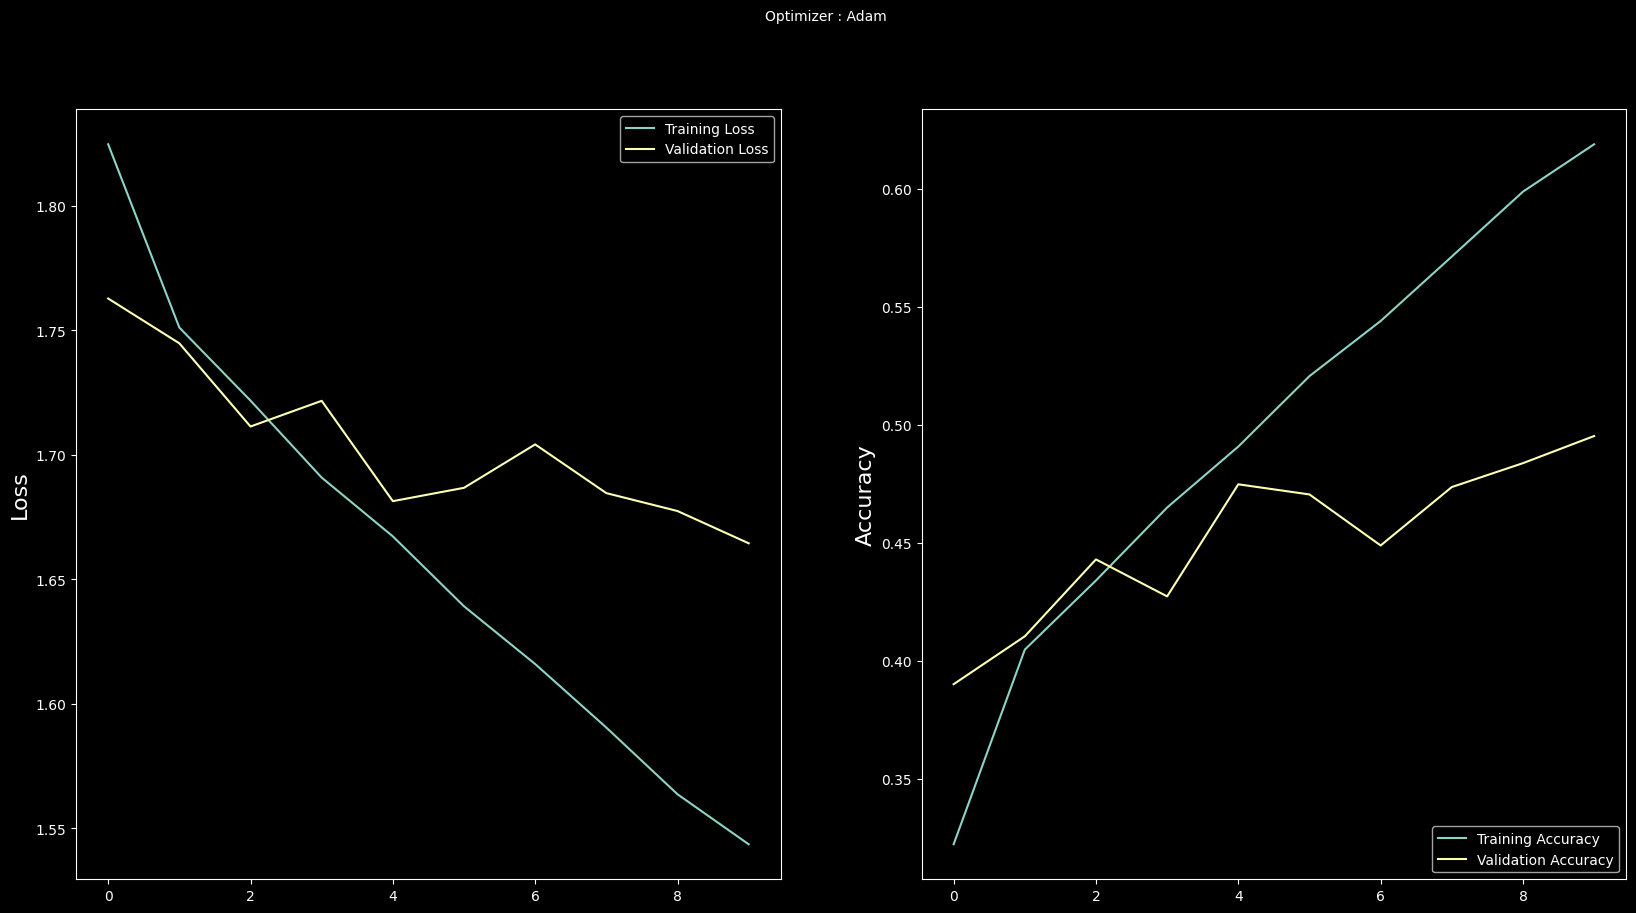

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(training_acc, label='Training Accuracy')
plt.plot(validation_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Performance du modèle sur les données de test

Après avoir entraîné le modèle sur les données d'entraînement et choisi un meilleur modèle à l'aide des données de validation, nous examinerons ensuite les performances du modèle sur les données de test.

## Questions

Q1 : Notez les performances sur les données `train`, `dev` et `test`. Sont elles semblables ?

L'ensemble d'entraînement est utilisé pour entraîner le modèle.
L'ensemble de validation est utilisé pour choisir le meilleur modèle pendant l'entraînement.
L'ensemble de test est utilisé pour évaluer la performance finale du modèle.

Q2 : Pourquoi existe-t-il un ensemble de `test` ? A quoi l'ensemble de `dev` sert-il ?

Ensemble de test : L'ensemble de test est utilisé pour évaluer la performance finale du modèle sur des données totalement nouvelles. Il permet de s'assurer que le modèle n'a pas simplement mémorisé les données d'entraînement, mais qu'il est capable de généraliser à de nouvelles données.

Ensemble de validation (dev) : L'ensemble de validation est utilisé pendant l'entraînement pour choisir le meilleur modèle parmi plusieurs. Il permet d'éviter le surapprentissage en évaluant le modèle sur des données qu'il n'a pas vues pendant l'entraînement. L'ensemble de validation est utilisé pour ajuster les hyperparamètres du modèle, tels que le taux d'apprentissage ou le nombre d'époques.




In [ ]:
PATH = "/content/best-weight.pt"
model = CNN()
model.load_state_dict(torch.load(PATH))

model.to(DEVICE)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4608, out_features=1024, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (relu4): ReLU()
  (fc3): Linear(in_features=1024, out_features=7, bias=True)
  (softmax): Softmax(dim=1)
)

In [ ]:
#check accuracy
correct=0
total=0
with torch.no_grad():
    for images,labels in testloader:
        images=images.to(DEVICE)
        labels=labels.to(DEVICE)
        outputs=model(images)
        _,predicted=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()
print('Accuracy of the network on the test images: {} %'.format(100*correct/total))
correct=0
total=0
with torch.no_grad():
    for images,labels in trainloader:
        images=images.to(DEVICE)
        labels=labels.to(DEVICE)
        outputs=model(images)
        _,predicted=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()
    print('Accuracy of the network on the train images: {} %'.format(100*correct/total))

Accuracy of the network on the test images: 48.88133673180402 %
Accuracy of the network on the train images: 63.651504111585304 %


Ensuite, nous traçons quelques images aléatoires, et si la prédiction n'est pas correcte, nous leur présentons une étiquette rouge.

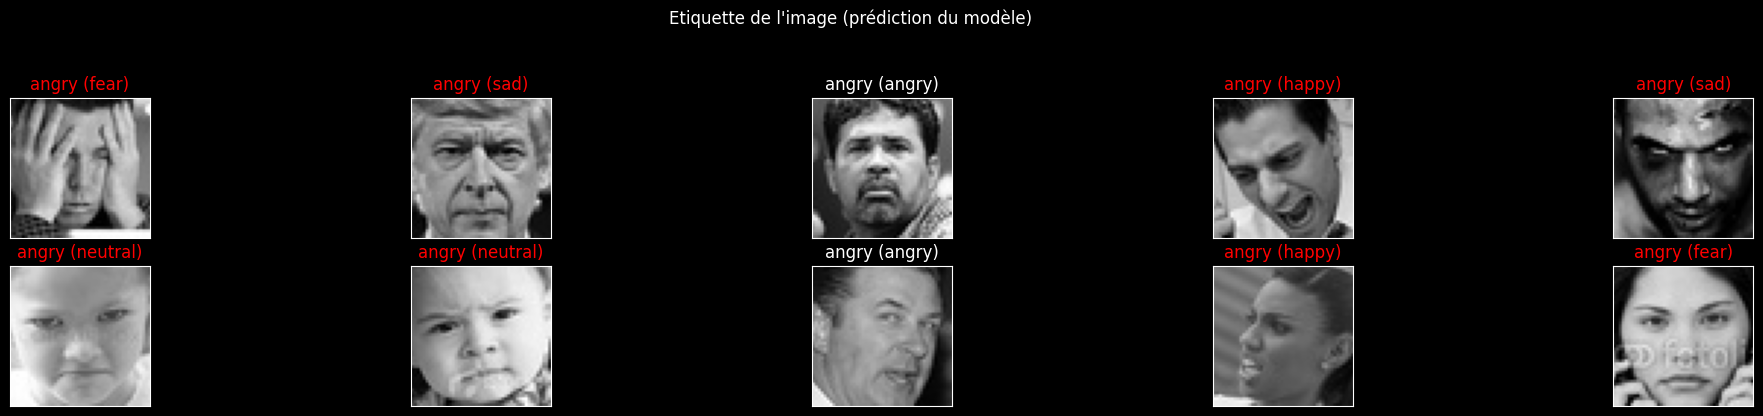

In [ ]:
#get some random test images to plot
dataiter=iter(testloader)
images,labels=next(dataiter)
images=images.to(DEVICE)
labels=labels.to(DEVICE)

#get predictions
outputs=model(images)
_,predicted=torch.max(outputs,1)

#plot the 10 images
fig=plt.figure(figsize=(25,4))
for i in range(10):
    ax=fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    img=np.squeeze(images.cpu().numpy()[i])
    # ax.imshow(img, cmap='gray')
    img = img.swapaxes(0,1) ##
    img = img.swapaxes(1,2) ##
    ax.imshow(img) ##
    ax.set_title("{} ({})".format(classes[labels[i].item()],classes[predicted[i].item()]),color="white" if labels[i].item()==predicted[i].item() else "red")
    ax.set_xticks([])
    ax.set_yticks([])
plt.suptitle("Etiquette de l'image (prédiction du modèle)", y=1.1);
plt.show()

# Visualisation d'activations

Les opérations du kernel dans le CNN peuvent être en partie considérées comme des filtres. Ces filtres ont pour but de faire correspondre des caractéristiques simples à des caractéristiques plus complexes et abstraites. Dans le code suivant, nous allons voir les caractéristiques de chaque couche CNN.

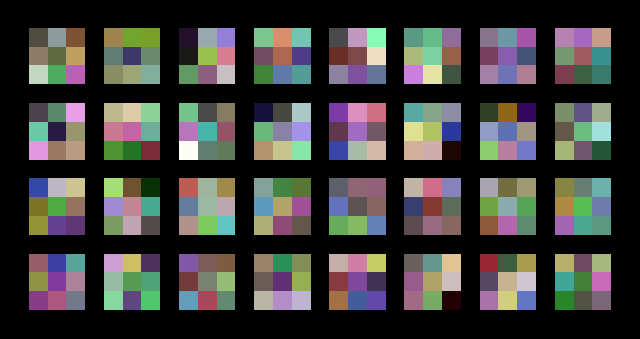

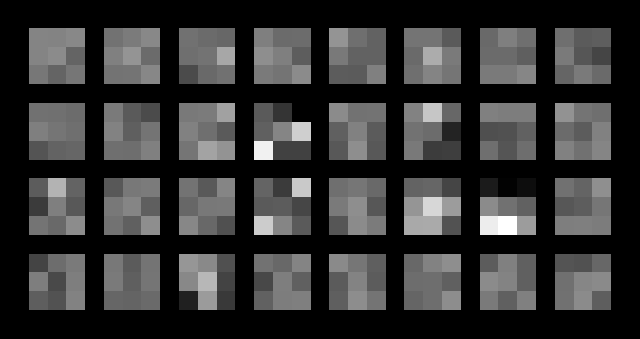

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import utils

def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1):
   n,c,w,h = tensor.shape
   if allkernels: tensor = tensor.view(n*c, -1, w, h)
   elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)
   rows = np.min((tensor.shape[0] // nrow + 1, 64))
   grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
   plt.figure(figsize=(nrow,rows) )
   plt.imshow(grid.numpy().transpose((1, 2, 0)))

filter1 = model.conv1.weight.data.clone().cpu()
visTensor(filter1, ch=0, allkernels=False)

plt.axis('off')
plt.ioff()
plt.show()
filter2 = model.conv2.weight.data.clone().cpu()
visTensor(filter2, ch=0, allkernels=False)

plt.axis('off')
plt.ioff()
plt.show()

##Activations

Les filtres ne sont pas toujours simples à interpreter. Les activations sont parfois plus parlantes. Une activation est le resultat d'une couche du réseau. Ci dessous, vous trouverez les activations pour une image pour les couches de convolution 1 et 2 pour chaque filtre.

## Questions

Q1 : Parcourez les activations. Quelles semble être les caracteristiques des images mise en avant par les filtres ? Notez que l'interpretation du niveau 2 est un peu plus directe.

La couche de convolution 1 détecte des caractéristiques simples, comme des bords et des textures.
La couche de convolution 2 combine ces caractéristiques pour former des motifs plus complexes, comme des expressions faciales.


In [ ]:
image, label = testset[32]
# plt.imshow(image.permute(1, 2, 0)) #(h, w, c)
plt.imshow(image.permute(1, 2, 0)[:, :, 0], cmap='gray')
plt.title(trainset.classes[label]); #label --> int

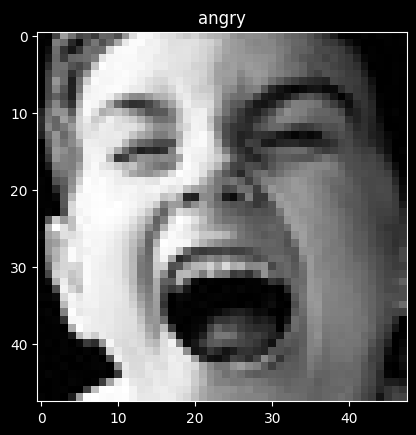

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

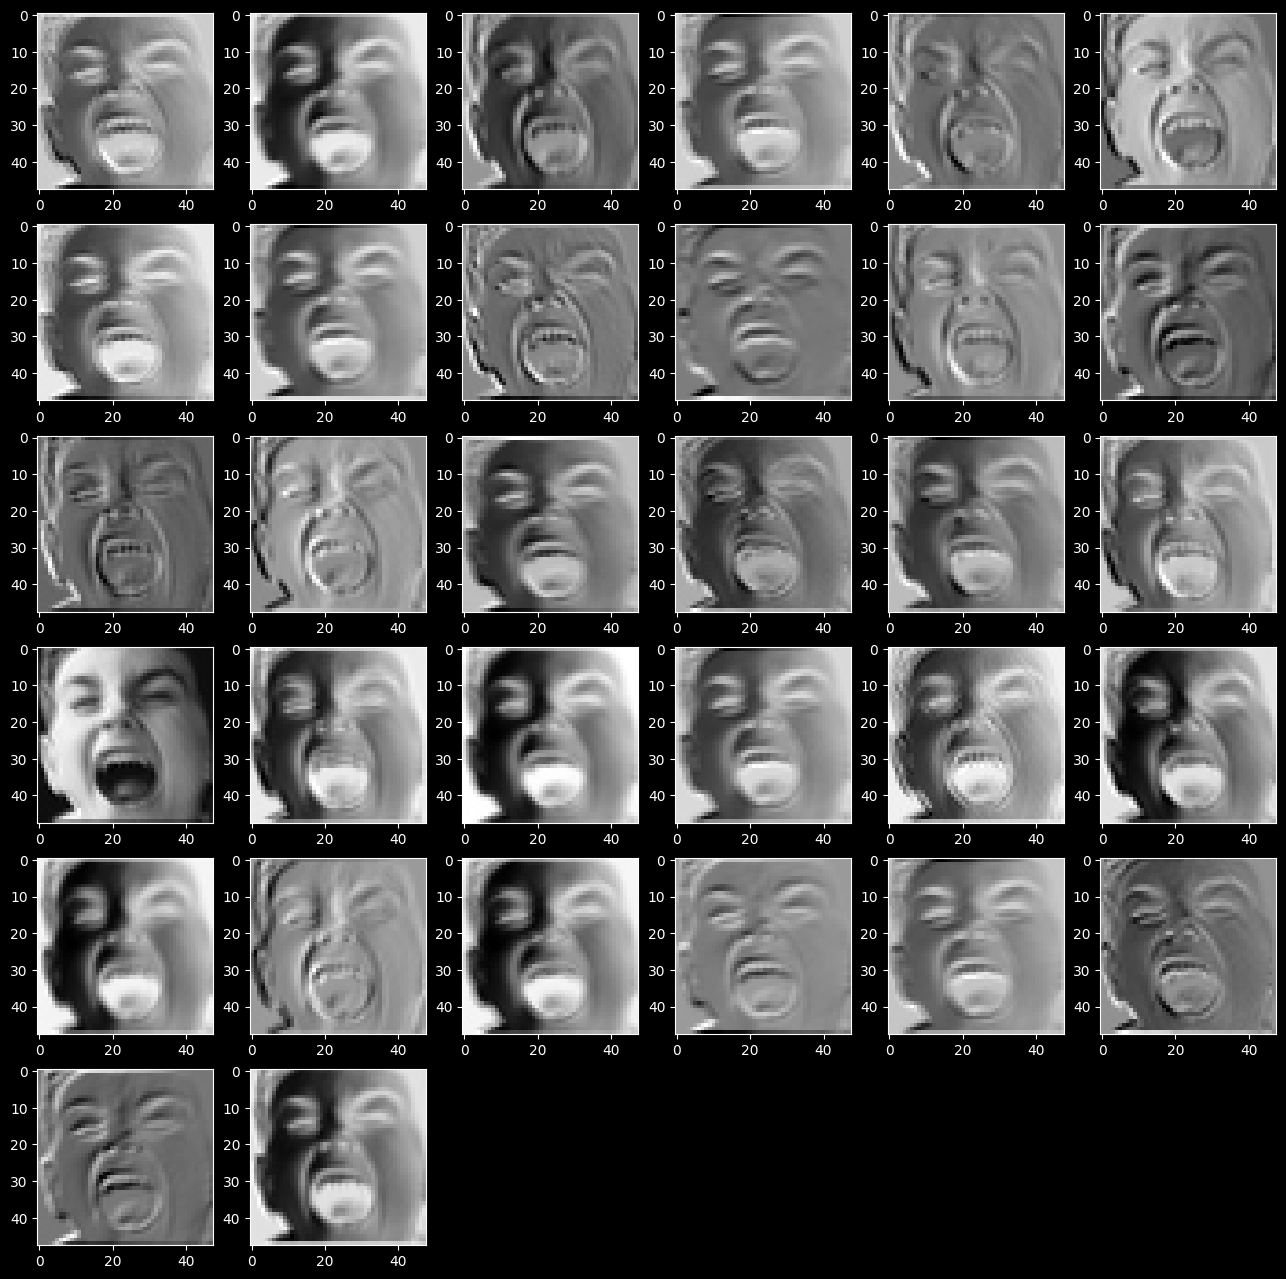

In [ ]:
# to visualize the activation
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook
model.conv1.register_forward_hook(get_activation('conv1'))

# add dimension in axis-0
# data.unsqueeze_(0)
for i,(data,target) in enumerate(testloader):
  if i==2:
    break
    #print(data.shape)
  output = model(data.to(DEVICE))

act = activation['conv1']
# plt.imshow(np.transpose(data[0],(1,2,0)).detach().cpu().numpy())
# plt.show()
plt.figure(figsize=(8*2,8*2))
cnt = 0
for j in range(act.size()[1]):
  cnt = cnt + 1
  num = int(np.floor(np.sqrt(act.size()[1]) + 1))
  plt.subplot(num,num,cnt)
  plt.imshow(act[0][cnt-1].detach().cpu().numpy(),cmap='gray')
plt.show()

torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])


<Figure size 1600x1600 with 0 Axes>

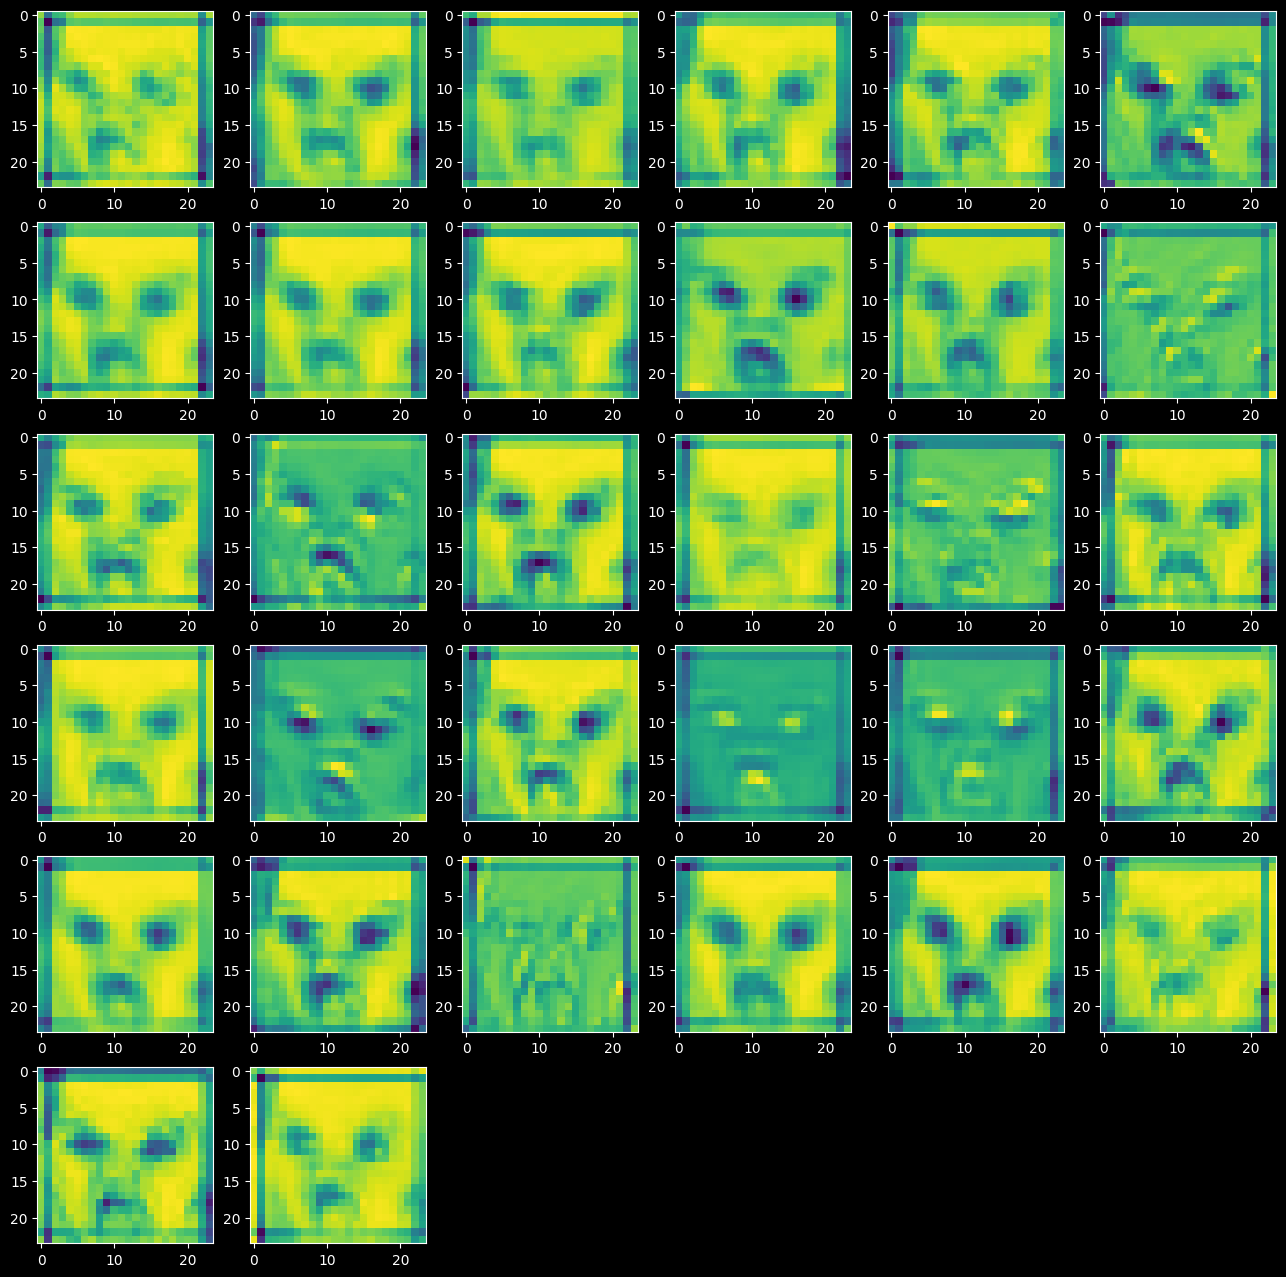

In [ ]:
# second layer
from torch.nn.modules import ModuleList

activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook
model.conv2.register_forward_hook(get_activation('conv2'))

# add dimension in axis-0
# data.unsqueeze_(0)
for i,(data,target) in enumerate(testloader):
  if i==2:
    break
  print (data.shape)
  output = model(data.to(DEVICE))

act = activation['conv2']
# plt.imshow(np.transpose(data[1],(1,2,0)).detach().cpu().numpy())
# plt.show()
plt.figure(figsize=(8*2,8*2))
cnt = 0
for j in range(act.size()[1]):
  cnt = cnt + 1
  num = int(np.floor(np.sqrt(act.size()[1]) + 1))
  plt.subplot(num,num,cnt)
  plt.imshow(act[1][cnt-1].detach().cpu().numpy())
plt.show()